In [4]:
import pretty_midi
import numpy as np
# For plotting
import mir_eval.display
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

# For putting audio in the notebook
import IPython.display

In [5]:
!ls

'check piano representation.ipynb'	     out.mid
 data					     output
 lib					    'pretty_midi Tutorial.ipynb'
'Music Representation - Music21.ipynb'	    'test quantizing.ipynb'
'Music Representation - pretty_midi.ipynb'


In [7]:
#midi_data = pretty_midi.PrettyMIDI("/home/agatha/Documents/EE298z/miniproj-2/prelim/music_generation_lstm/input/stardew_valley/Stardew Valley Overture - Transcribed by TheSuperCommentGuy.mid")
INPUT_FOLDER = "./data/preprocessed/single_piano/midi_bts/"
midi_path = INPUT_FOLDER + "BTS - Boy With Luv (DJS137).mid"
midi_data = pretty_midi.PrettyMIDI(midi_path)

In [24]:
for instrument in midi_data.instruments:
    print(instrument)
    for i, note in enumerate(instrument.notes):
        print(note)
        note_name = pretty_midi.note_number_to_name(note.pitch)
        print(note_name)
        print(pretty_midi.note_name_to_number(note_name))
        if (i > 5):
            break

Instrument(program=0, is_drum=False, name="MIDI Out")
Note(start=0.000000, end=0.375094, pitch=71, velocity=99)
B4
71
Note(start=0.375094, end=0.750188, pitch=74, velocity=92)
D5
74
Note(start=0.750188, end=1.125281, pitch=76, velocity=95)
E5
76
Note(start=1.125281, end=1.500375, pitch=78, velocity=95)
F#5
78
Note(start=1.500375, end=1.750438, pitch=79, velocity=100)
G5
79
Note(start=0.000000, end=2.000500, pitch=55, velocity=91)
G3
55
Note(start=0.000000, end=2.000500, pitch=59, velocity=91)
B3
59


In [30]:
hist = midi_data.get_pitch_class_histogram(normalize=False)
print(hist)
print(len(hist))


[  0. 210. 255.   0. 240.   0. 268.  91.   0. 290.   0. 227.]
12


In [32]:
hist_velocity = midi_data.get_pitch_class_histogram(use_velocity=True)
print(hist_velocity)
print(len(hist_velocity))


[0.         0.13278857 0.15876242 0.         0.15322388 0.
 0.1728134  0.05535131 0.         0.18734866 0.         0.13971175]
12


In [20]:
piano_roll = midi_data.get_piano_roll(fs=100)

In [19]:
piano_roll.shape

(128, 228062)

In [13]:
piano_roll

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
def plot_piano_roll(pm, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs),
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note')


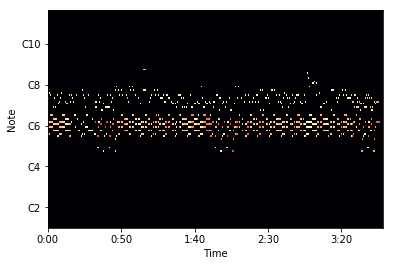

In [25]:
plot_piano_roll(midi_data)

In [26]:
midi_data.instruments

[Instrument(program=0, is_drum=False, name="MIDI Out")]

In [27]:
midi_data.time_signature_changes

[TimeSignature(numerator=4, denominator=4, time=0.0)]

In [28]:
midi_data.key_signature_changes

[]

In [29]:
midi_data.estimate_tempo()

196.5070607225622

In [30]:
midi_data.estimate_tempi()

(array([196.50706072, 196.9318991 , 206.03544766, 182.46388973,
        195.79105224, 183.48354088, 198.00207541, 198.57104689,
        151.5410621 , 198.57104689, 169.36942235, 185.76001161,
        179.95501125, 205.66287   , 195.9434527 , 179.95501125,
        187.77914217, 189.84264923, 193.15925736, 182.39783945,
        176.79790579, 179.95501125, 159.96001   , 143.66470752,
        195.20543593, 179.95501125, 159.96001   , 191.952012  ,
        197.4363552 , 205.66287   , 205.66287   , 179.95501125,
        179.95501125, 133.30000833, 149.96250937, 198.57104689,
        174.50182909, 146.249152  , 172.54113438, 172.54113438,
        191.952012  , 159.96001   , 193.56505411, 159.96001   ,
        188.034624  , 174.50182909, 101.02737474, 191.952012  ,
        196.87385846, 119.9700075 , 187.27025561, 191.952012  ,
        188.8052577 , 188.034624  , 188.034624  , 145.32644441,
        196.87385846, 114.03089822, 184.76664256, 114.03089822,
        183.78384127, 185.76001161, 119.

In [14]:
midi_data.get_piano_roll(fs=100)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
midi_data.get_tempo_changes()

(array([0.]), array([119.9700075]))

In [32]:
midi_data.get_onsets()

array([  0.        ,   0.        ,   0.        , ..., 223.43084375,
       223.8059375 , 223.8059375 ])

In [33]:
midi_data.time_to_tick(1.0)

192

In [34]:
midi_data.time_to_tick(1.2)

230

In [21]:
midi_data.tick_to_time(1)

0.005209635416666667

In [22]:
midi_data.tick_to_time(16)

0.08335416666666667


# Using Magenta music library

In [31]:
from magenta.music import midi_io


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [33]:
seq = midi_io.midi_file_to_note_sequence(midi_path)

/home/agatha/miniconda3/envs/ee298z/lib/python3.6/site-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


In [36]:
seq

ticks_per_quarter: 96
time_signatures {
  numerator: 4
  denominator: 4
}
tempos {
  qpm: 120.0
}
notes {
  pitch: 71
  velocity: 99
  end_time: 0.375
}
notes {
  pitch: 74
  velocity: 92
  start_time: 0.375
  end_time: 0.75
}
notes {
  pitch: 76
  velocity: 95
  start_time: 0.75
  end_time: 1.125
}
notes {
  pitch: 78
  velocity: 95
  start_time: 1.125
  end_time: 1.5
}
notes {
  pitch: 79
  velocity: 100
  start_time: 1.5
  end_time: 1.75
}
notes {
  pitch: 78
  velocity: 94
  start_time: 1.75
  end_time: 2.25
}
notes {
  pitch: 71
  velocity: 94
  start_time: 4.0
  end_time: 4.375
}
notes {
  pitch: 74
  velocity: 90
  start_time: 4.375
  end_time: 4.75
}
notes {
  pitch: 76
  velocity: 95
  start_time: 4.75
  end_time: 5.125
}
notes {
  pitch: 73
  velocity: 95
  start_time: 5.125
  end_time: 5.5
}
notes {
  pitch: 71
  velocity: 96
  start_time: 5.5
  end_time: 5.75
}
notes {
  pitch: 73
  velocity: 91
  start_time: 5.75
  end_time: 6.25
}
notes {
  pitch: 78
  velocity: 100
  sta

In [39]:
seq.notes

[pitch: 71
velocity: 99
end_time: 0.375
, pitch: 74
velocity: 92
start_time: 0.375
end_time: 0.75
, pitch: 76
velocity: 95
start_time: 0.75
end_time: 1.125
, pitch: 78
velocity: 95
start_time: 1.125
end_time: 1.5
, pitch: 79
velocity: 100
start_time: 1.5
end_time: 1.75
, pitch: 78
velocity: 94
start_time: 1.75
end_time: 2.25
, pitch: 71
velocity: 94
start_time: 4.0
end_time: 4.375
, pitch: 74
velocity: 90
start_time: 4.375
end_time: 4.75
, pitch: 76
velocity: 95
start_time: 4.75
end_time: 5.125
, pitch: 73
velocity: 95
start_time: 5.125
end_time: 5.5
, pitch: 71
velocity: 96
start_time: 5.5
end_time: 5.75
, pitch: 73
velocity: 91
start_time: 5.75
end_time: 6.25
, pitch: 78
velocity: 100
start_time: 7.0
end_time: 7.375
, pitch: 73
velocity: 100
start_time: 7.375
end_time: 7.75
, pitch: 74
velocity: 100
start_time: 7.75
end_time: 8.0
, pitch: 71
velocity: 95
start_time: 8.0
end_time: 8.375
, pitch: 74
velocity: 92
start_time: 8.375
end_time: 8.75
, pitch: 76
velocity: 94
start_time: 8.75

In [9]:
midi_data = pretty_midi.PrettyMIDI("/home/agatha/Documents/EE298z/miniproj-2/data/modern_games/plants_vs_zombies/Main Menu (PvZ) - Transcribed by TheSuperCommentGuy.mid")

In [10]:
for instrument in midi_data.instruments:
    print(instrument)
    for i, note in enumerate(instrument.notes):
        print(note)
        if (i > 5):
            break

Instrument(program=0, is_drum=False, name="Ocarina (MIDI)")
Note(start=0.000000, end=0.250000, pitch=55, velocity=100)
Note(start=0.250000, end=0.500000, pitch=62, velocity=100)
Note(start=0.500000, end=0.750000, pitch=61, velocity=100)
Note(start=0.750000, end=1.000000, pitch=62, velocity=100)
Note(start=1.000000, end=1.250000, pitch=65, velocity=100)
Note(start=1.250000, end=1.500000, pitch=62, velocity=100)
Note(start=4.000000, end=4.250000, pitch=55, velocity=100)
Instrument(program=0, is_drum=False, name="Harp (MIDI)")
Note(start=0.000000, end=0.250000, pitch=73, velocity=100)
Note(start=0.250000, end=0.500000, pitch=74, velocity=100)
Note(start=0.500000, end=0.750000, pitch=73, velocity=100)
Note(start=0.750000, end=1.000000, pitch=74, velocity=100)
Note(start=1.000000, end=1.250000, pitch=70, velocity=100)
Note(start=1.250000, end=1.500000, pitch=67, velocity=100)
Note(start=1.500000, end=1.750000, pitch=67, velocity=77)
Instrument(program=0, is_drum=False, name="Muted Strings (